People Count: 149


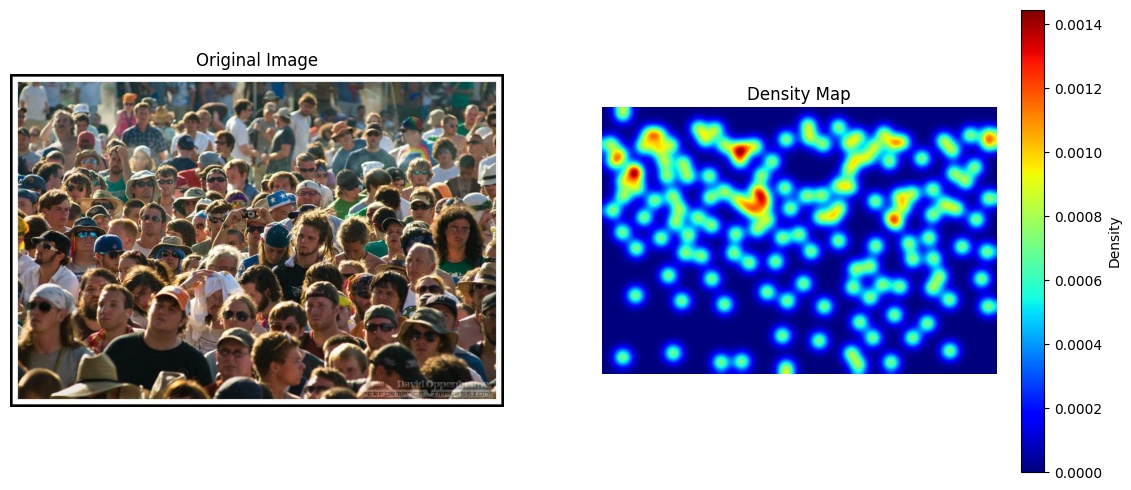

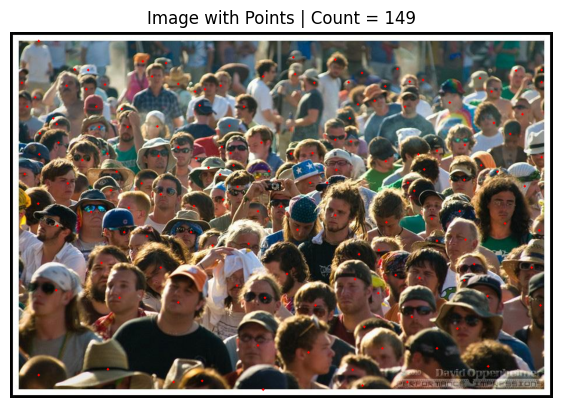

In [5]:
import cv2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# -------------------------------
# 1. PATHS
# -------------------------------
img_path = r"C:/Users/Lenovo/Downloads/deep dataset/part_A_final/test_data/images/IMG_55.jpg"
gt_path  = r"C:/Users/Lenovo/Downloads/deep dataset/part_A_final/test_data/ground_truth/GT_IMG_55.mat"

# -------------------------------
# 2. LOAD IMAGE
# -------------------------------
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

# -------------------------------
# 3. LOAD GROUND TRUTH POINTS
# -------------------------------
gt = scipy.io.loadmat(gt_path)
points = gt["image_info"][0][0][0][0][0]
count = len(points)
print("People Count:", count)

# -------------------------------
# 4. DENSITY MAP GENERATION
# -------------------------------
density = np.zeros((h, w), dtype=np.float32)

for (x, y) in points:
    x = int(x)
    y = int(y)
    if 0 <= x < w and 0 <= y < h:
        density[y, x] = 1

density_map = gaussian_filter(density, sigma=15)

# -------------------------------
# 5. PLOT FIGURE 1 (Side-by-side)
# -------------------------------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(density_map, cmap="jet")
plt.colorbar(label="Density")
plt.title("Density Map")
plt.axis("off")

plt.show()

# -------------------------------
# 6. PLOT FIGURE 2 (Image with Points)
# -------------------------------
img_points = img.copy()
for (x, y) in points:
    cv2.circle(img_points, (int(x), int(y)), 2, (255, 0, 0), -1)

plt.figure(figsize=(7, 7))
plt.imshow(img_points)
plt.title(f"Image with Points | Count = {count}")
plt.axis("off")
plt.show()